In [23]:
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Union
import seaborn as sns
import scipy
from scipy.io import mmread

# E12

In [24]:
cyto = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E12f_CytO.h5ad')
spla = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E12f_splatter.h5ad')
simp = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E12f_splatter_simple.h5ad')
scde = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E12f_scDesign3.h5ad')
scva = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E12f_scVAEDer.h5ad')
real = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/data_standard/Zygote_to_CS7.h5ad')

/slurm/home/yrd/liaolab/caohaoxue/anaconda3/envs/my_env/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
real = real[real.obs.time == 'E12']
real.var = real.var.rename(columns = {'x':'features'})
real.var.index = real.var.features

sc.pp.normalize_total(spla, target_sum=1e4)
sc.pp.normalize_total(simp, target_sum=1e4)
sc.pp.normalize_total(scde, target_sum=1e4)
scva.X = np.expm1(scva.X)
sc.pp.normalize_total(scva, target_sum=1e4)

scva.var['features'] = scva.var.index
scva.var.index = scva.var.features

scva.obs['time'] = 'E12-scVAEDer'
name = new_list = [s + "-cell" for s in scva.obs.index]
scva.obs.index = name

spla.obs.time = 'E12-Splatter'
simp.obs.time = 'E12-Splatter-Simple'

/slurm/home/yrd/liaolab/caohaoxue/anaconda3/envs/my_env/lib/python3.13/site-packages/anndata/_core/anndata.py:602: FutureWarning: You are attempting to set `X` to a matrix on a view which has non-unique indices. The resulting `adata.X` will likely not equal the value to which you set it. To avoid this potential issue, please make a copy of the data first. In the future, this operation will throw an error.
  warnings.warn(msg, FutureWarning, stacklevel=1)
/tmp/ipykernel_3332/2216836176.py:2: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
  real.X = np.expm1(real.X)


In [4]:
adata = real
adata.obs['stage'] = 'E12'
sc.tl.rank_genes_groups(real, 'merge_type', method='wilcoxon')
marker_genes = pd.DataFrame(real.uns['rank_genes_groups']['names']).head(15)
print(marker_genes)

      Epiblast Hypoblast      Others Trophoblast     YolkSac
0       KHDC3L      CST1     COL15A1       GRHL1        STX3
1       CYP2S1    TMEM37       TAF1B       ACKR2       G6PC3
2        DPPA5      CPN1       SMIM7     GRAMD2B         VIM
3       POU5F1      CST3      PRPF39     SLC27A6       PRDX4
4        DPPA4   FAM213A       TIMP3     ADAMTS1        DLC1
5         GDF3     PRAP1       CRHR2      MGAT4A      IFITM2
6   AC064802.1     PCBD1      PCDHB3      FLVCR2         NTS
7         PIM2      CTSE       TCF21         MVP  AC004837.2
8        GSTP1      OCLN       TARID       NUCB2       CDH11
9         PTMA      MTTP        MTPN      TFAP2A   LINC01124
10      CXCL12     REEP6  AC010478.1      ARID5B        LIX1
11       NANOG       F10         MGP        VSIR  AC090409.1
12       UNC5B     EPCAM       TMOD1        WFS1        RGS4
13       VSNL1       HPX     ZDHHC11       CSRP1        CCNI
14       TERF1    PIK3R6      TP53I3      MAN1A2       HOXB5


In [ ]:
marker = {'Epiblast':['KHDC3L','CYP2S1','DPPA5'],
          'Hypoblast':['CST1','TMEM37','CST3'],
          'Trophoblast':['ACKR2','ADAMTS1','MGAT4A'],
          'YolkSac':['STX3','VIM']}

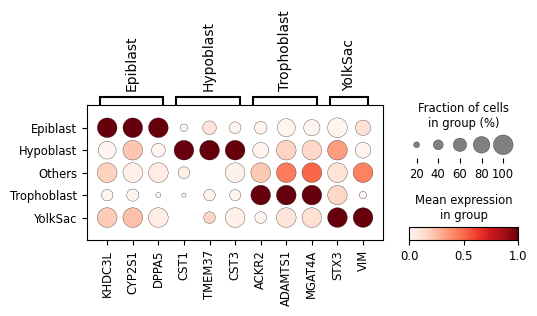

In [48]:
sc.pl.dotplot(
    real,
    groupby="merge_type",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'E12_marker_real.pdf'
)

In [5]:
adata = cyto
adata.obs['stage'] = 'E12'
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)

/tmp/ipykernel_3332/1717941669.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 0.5)


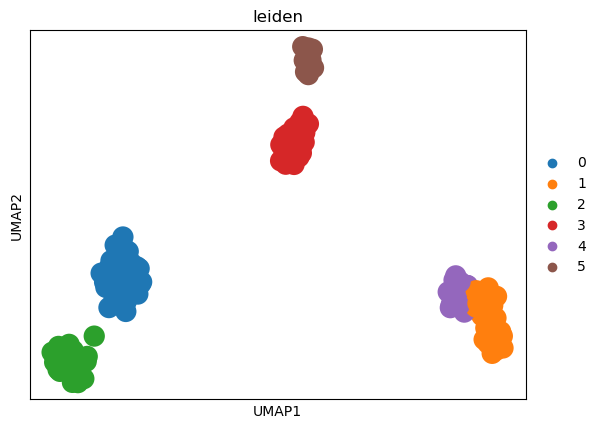

In [18]:
sc.pl.umap(adata, color = 'leiden')

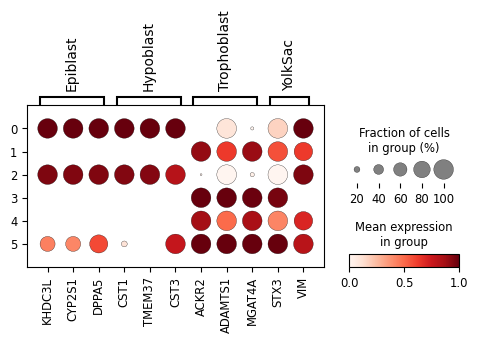

In [43]:
sc.pl.dotplot(
    cyto,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'E12_marker_cyto.pdf'
)

In [17]:
sc.pl.umap(adata, color = ['KHDC3L','CYP2S1','DPPA5','POU5F1','GDF3','PIM2','CXCL12','NANOG'])
sc.pl.umap(adata, color = ['CST1','TMEM37','CST3','FAM213A','PRAP1','PCBD1','CTSE','OCLN'])
sc.pl.umap(adata, color = ['ACKR2','ADAMTS1','MGAT4A','MVP','NUCB2','ARID5B','VSIR','MAN1A2'])
sc.pl.umap(adata, color = ['STX3','VIM','DLC1','IFITM2','NTS','CDH11','LIX1','RGS4'])

In [34]:
adata.obs['merge_type'] = adata.obs.leiden.map({'0':'Hypoblast',
                                                '1':'Trophoblast',
                                                '2':'Epiblast',
                                                '3':'Trophoblast',
                                                '4':'Others',
                                                '5':'YolkSac'})

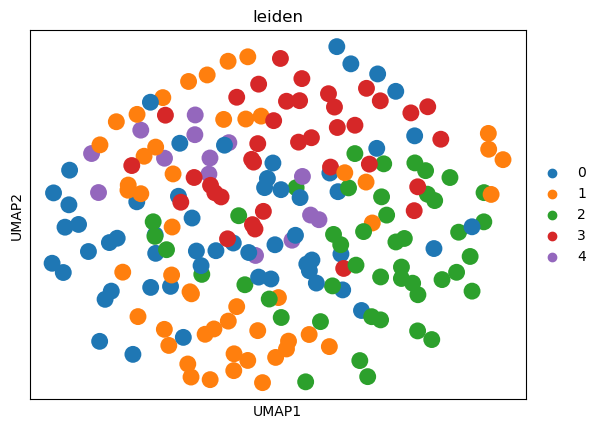

In [ ]:
adata = spla
adata.obs['stage'] = 'E12'
#sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.75)
sc.pl.umap(adata, color = 'leiden')

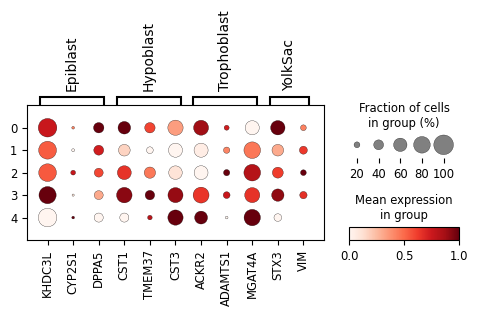

In [46]:
sc.pl.dotplot(
    spla,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'E12_marker_spla.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['KHDC3L','CYP2S1','DPPA5','POU5F1','GDF3','PIM2','CXCL12','NANOG'])
sc.pl.umap(adata, color = ['CST1','TMEM37','CST3','FAM213A','PRAP1','PCBD1','CTSE','OCLN'])
sc.pl.umap(adata, color = ['ACKR2','ADAMTS1','MGAT4A','MVP','NUCB2','ARID5B','VSIR','MAN1A2'])
sc.pl.umap(adata, color = ['STX3','VIM','DLC1','IFITM2','NTS','CDH11','LIX1','RGS4'])

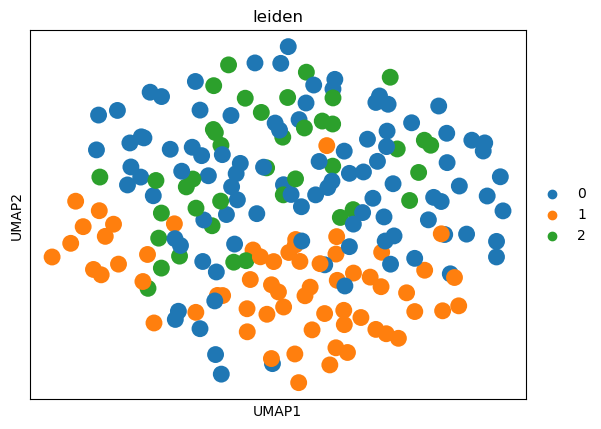

In [57]:
adata = simp
adata.obs['stage'] = 'E12'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.7)
sc.pl.umap(adata, color = 'leiden')

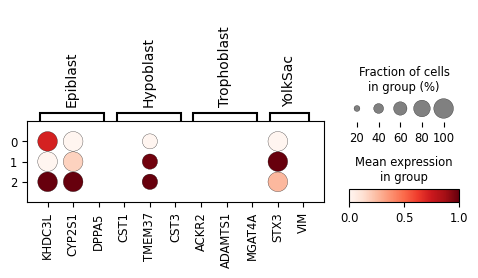

In [47]:
sc.pl.dotplot(
    simp,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'E12_marker_simp.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['KHDC3L','CYP2S1','DPPA5','POU5F1','GDF3','PIM2','CXCL12','NANOG'])
sc.pl.umap(adata, color = ['CST1','TMEM37','CST3','FAM213A','PRAP1','PCBD1','CTSE','OCLN'])
sc.pl.umap(adata, color = ['ACKR2','ADAMTS1','MGAT4A','MVP','NUCB2','ARID5B','VSIR','MAN1A2'])
sc.pl.umap(adata, color = ['STX3','VIM','DLC1','IFITM2','NTS','CDH11','LIX1','RGS4'])

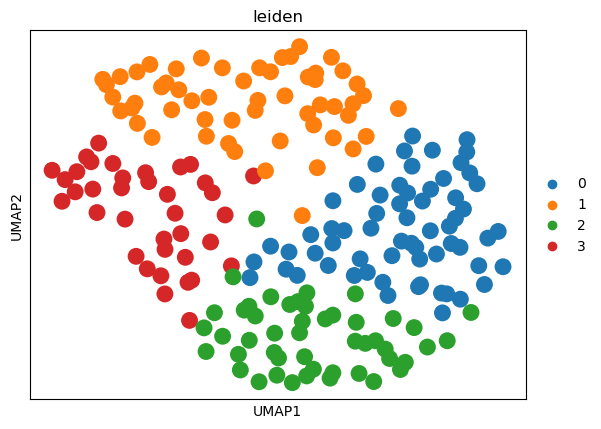

In [60]:
adata = scde
adata.obs['stage'] = 'E12'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.75)
sc.pl.umap(adata, color = 'leiden')

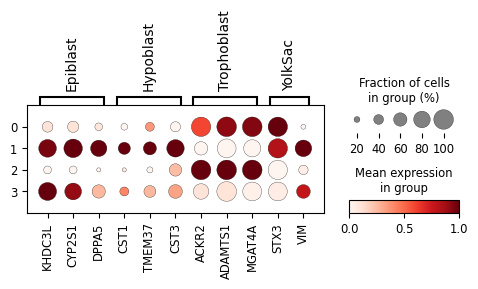

In [45]:
sc.pl.dotplot(
    scde,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'E12_marker_scde.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['KHDC3L','CYP2S1','DPPA5','POU5F1','GDF3','PIM2','CXCL12','NANOG'])
sc.pl.umap(adata, color = ['CST1','TMEM37','CST3','FAM213A','PRAP1','PCBD1','CTSE','OCLN'])
sc.pl.umap(adata, color = ['ACKR2','ADAMTS1','MGAT4A','MVP','NUCB2','ARID5B','VSIR','MAN1A2'])
sc.pl.umap(adata, color = ['STX3','VIM','DLC1','IFITM2','NTS','CDH11','LIX1','RGS4'])

In [62]:
adata.obs['merge_type'] = adata.obs.leiden.map({'0':'Trophoblast',
                                                '1':'Epiblast',
                                                '2':'Trophoblast',
                                                '3':'Hypoblast'})

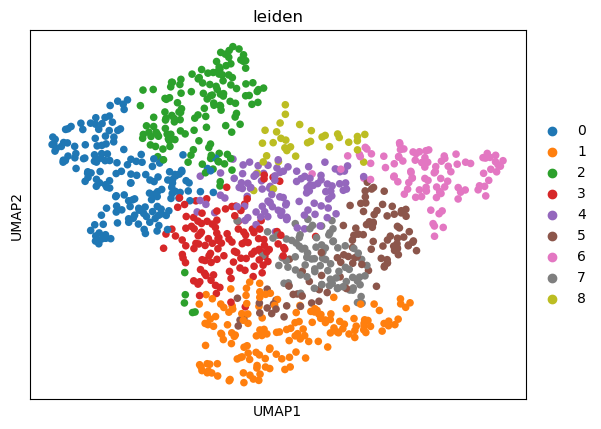

In [63]:
adata = scva
adata.obs['stage'] = 'E12'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.75)
sc.pl.umap(adata, color = 'leiden')

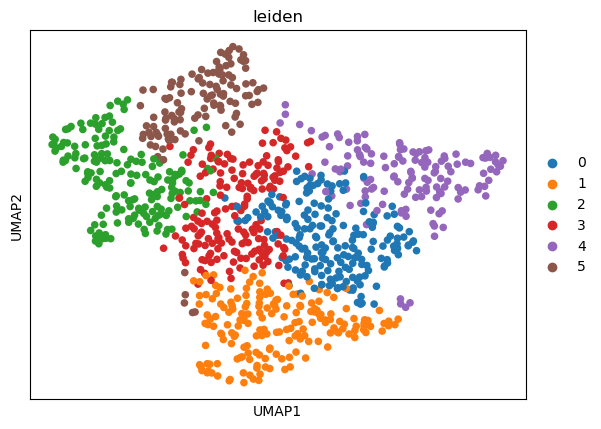

In [64]:
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = 'leiden')

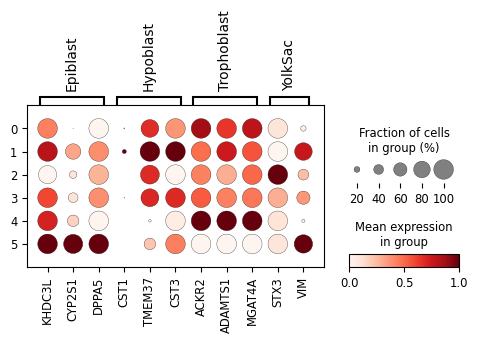

In [44]:
sc.pl.dotplot(
    scva,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'E12_marker_scva.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['KHDC3L','CYP2S1','DPPA5','POU5F1','GDF3','PIM2','CXCL12','NANOG'])
sc.pl.umap(adata, color = ['CST1','TMEM37','CST3','FAM213A','PRAP1','PCBD1','CTSE','OCLN'])
sc.pl.umap(adata, color = ['ACKR2','ADAMTS1','MGAT4A','MVP','NUCB2','ARID5B','VSIR','MAN1A2'])
sc.pl.umap(adata, color = ['STX3','VIM','DLC1','IFITM2','NTS','CDH11','LIX1','RGS4'])

In [73]:
adata.obs['merge_type'] = adata.obs.leiden.map({'0':'Trophoblast',
                                                '1':'Trophoblast',
                                                '2':'Others',
                                                '3':'Hypoblast',
                                                '4':'Trophoblast',
                                                '5':'Epiblast'})

In [75]:
spla.obs['merge_type'] = 'Unknown'
simp.obs['merge_type'] = 'Unknown'

In [76]:
cyto.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E12f_CytO.h5ad')
spla.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E12f_splatter.h5ad')
simp.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E12f_splatter_simple.h5ad')
scde.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E12f_scDesign3.h5ad')
scva.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E12f_scVAEDer.h5ad')

# E14

In [27]:
cyto = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E14f_CytO.h5ad')
spla = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E14f_splatter.h5ad')
simp = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E14f_splatter_simple.h5ad')
scde = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E14f_scDesign3.h5ad')
scva = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E14f_scVAEDer.h5ad')
real = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/data_standard/Zygote_to_CS7.h5ad')

/slurm/home/yrd/liaolab/caohaoxue/anaconda3/envs/my_env/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [11]:
real = real[real.obs.time == 'E14']
real.X = np.expm1(real.X)
real.var = real.var.rename(columns = {'x':'features'})
real.var.index = real.var.features

sc.pp.normalize_total(spla, target_sum=1e4)
sc.pp.normalize_total(simp, target_sum=1e4)
sc.pp.normalize_total(scde, target_sum=1e4)
scva.X = np.expm1(scva.X)
sc.pp.normalize_total(scva, target_sum=1e4)

scva.var['features'] = scva.var.index
scva.var.index = scva.var.features

scva.obs['time'] = 'E14-scVAEDer'
name = new_list = [s + "-cell" for s in scva.obs.index]
scva.obs.index = name

spla.obs.time = 'E14-Splatter'
simp.obs.time = 'E14-Splatter-Simple'

/slurm/home/yrd/liaolab/caohaoxue/anaconda3/envs/my_env/lib/python3.13/site-packages/anndata/_core/anndata.py:602: FutureWarning: You are attempting to set `X` to a matrix on a view which has non-unique indices. The resulting `adata.X` will likely not equal the value to which you set it. To avoid this potential issue, please make a copy of the data first. In the future, this operation will throw an error.
  warnings.warn(msg, FutureWarning, stacklevel=1)
/tmp/ipykernel_20976/1258764099.py:2: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
  real.X = np.expm1(real.X)


In [ ]:
adata = real
adata.obs['stage'] = 'E14'
sc.pp.log1p(adata)
sc.tl.rank_genes_groups(real, 'merge_type', method='wilcoxon')
marker_genes = pd.DataFrame(real.uns['rank_genes_groups']['names']).head(15)
print(marker_genes)

      Epiblast  Hypoblast      Others Trophoblast   YolkSac
0         PIM2       VIL1       CALM2        CBLB     APLNR
1   AC064802.1  LINC00261      HOXA13       CD274     HAND1
2        DPPA5       APOM       WNT5A       ACKR2    COL5A2
3       POU5F1  LINC02413        BUB3        DLX3     PITX2
4        NANOG      FOXA2  AC092745.1       HTRA4      FEZ1
5       CRABP1        IHH       CMTM7      ERVW-1    HAPLN1
6       KHDC3L      APOA1       PBDC1      MGAT4A      RGS5
7        SFRP2       CTSE        ISL1       PPARD      LIX1
8         SPP1     LGALS2      SLC9A9       GATA3      ZEB2
9          GAL      HNF1B        SOX7      HSD3B1      DLC1
10        GDF3       APOB        TLR4       MBNL2      LEF1
11     SCGB3A2      SOX17       S1PR1      MAN1A2  PRICKLE1
12       VASH2      FOXA1      ANKS1A       NUCB2     BAMBI
13      CYP2S1       NQO1       PMP22       VGLL1     ACTC1
14       UCHL1      PCBD1  AC084033.3        VSIR     HOXB2


In [28]:
marker = {'Epiblast':['PIM2','DPPA5','POU5F1'],
          'Hypoblast':['VIL1','APOM','FOXA2'],
          'Trophoblast':['CBLB','CD274','ACKR2'],
          'YolkSac':['APLNR','HAND1']}

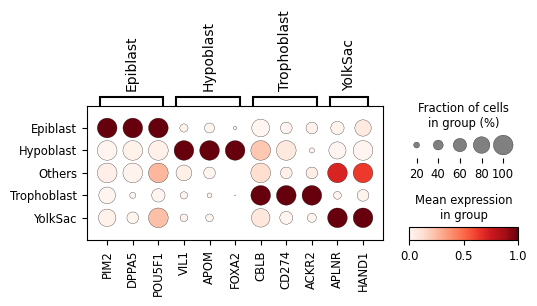

In [52]:
sc.pl.dotplot(
    real,
    groupby="merge_type",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'E14_marker_real.pdf'
)

/tmp/ipykernel_20976/2453341236.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 0.5)


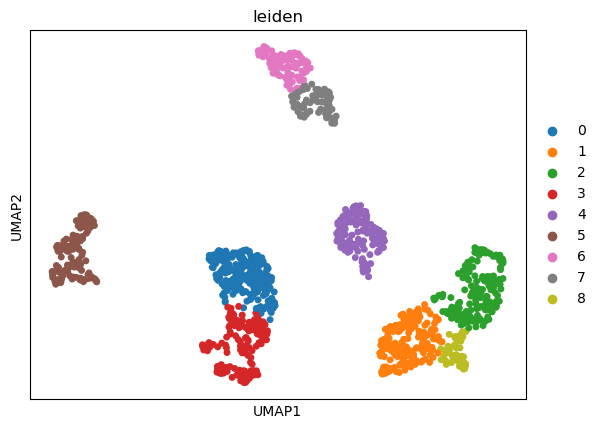

In [13]:
adata = cyto
adata.obs['stage'] = 'E14'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = 'leiden')

In [ ]:
sc.pl.umap(adata, color = ['PIM2','DPPA5','POU5F1','NANOG','KHDC3L','SFRP2','SPP1', 'GAL']) #Epi
sc.pl.umap(adata, color = ['VIL1','APOM','FOXA2','IHH','APOA1','CTSE','LGALS2','HNF1B']) #Hypo
sc.pl.umap(adata, color = ['CBLB','CD274','ACKR2','DLX3','HTRA4','ERVW-1','MGAT4A','PPARD']) #Troph
sc.pl.umap(adata, color = ['APLNR','HAND1','COL5A2','PITX2','FEZ1','HAPLN1','LIX1','RGS5']) #YS

In [21]:
adata.obs['merge_type'] = adata.obs.leiden.map({'0':'YolkSac',
                                                '1':'Epiblast',
                                                '2':'YolkSac',
                                                '3':'Hypoblast',
                                                '4':'Epiblast',
                                                '5':'Trophoblast',
                                                '6':'Others'})

In [18]:
sc.tl.leiden(adata, resolution = 0.2)
sc.pl.umap(adata, color = 'leiden')

sc.pl.dotplot(
    cyto,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'E14_marker_cyto.pdf'
)

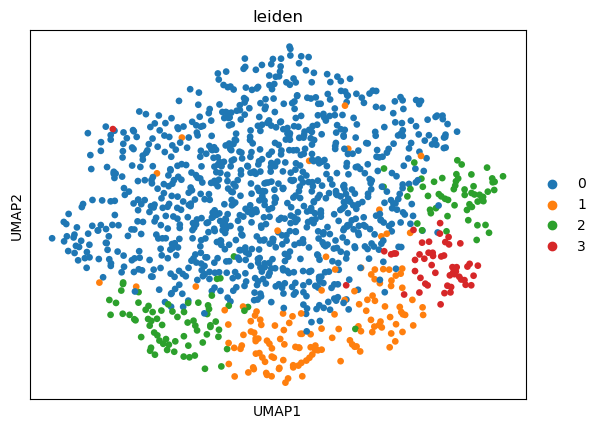

In [22]:
adata = spla
adata.obs['stage'] = 'E14'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = 'leiden')

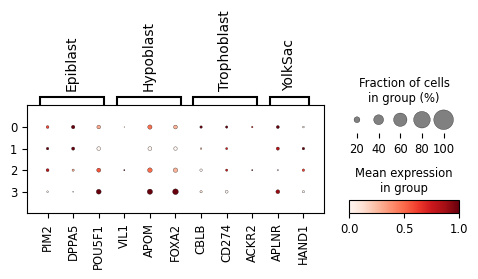

In [31]:
sc.pl.dotplot(
    spla,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    dot_max = 1.0,
    save = 'E14_marker_spla.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['PIM2','DPPA5','POU5F1','NANOG','KHDC3L','SFRP2','SPP1', 'GAL']) #Epi
sc.pl.umap(adata, color = ['VIL1','APOM','FOXA2','IHH','APOA1','CTSE','LGALS2','HNF1B']) #Hypo
sc.pl.umap(adata, color = ['CBLB','CD274','ACKR2','DLX3','HTRA4','ERVW-1','MGAT4A','PPARD']) #Troph
sc.pl.umap(adata, color = ['APLNR','HAND1','COL5A2','PITX2','FEZ1','HAPLN1','LIX1','RGS5']) #YS

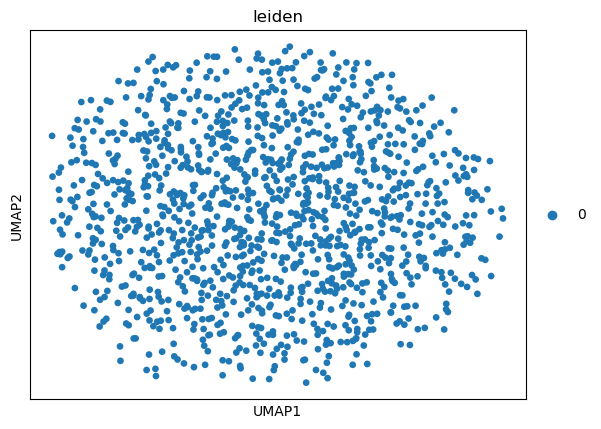

In [27]:
adata = simp
adata.obs['stage'] = 'E14'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.6)
sc.pl.umap(adata, color = 'leiden')

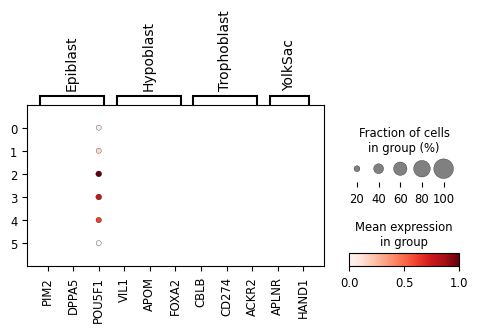

In [ ]:
sc.pl.dotplot(
    simp,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    dot_max = 1.0,
    save = 'E14_marker_simp.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['PIM2','DPPA5','POU5F1','NANOG','KHDC3L','SFRP2','SPP1', 'GAL']) #Epi
sc.pl.umap(adata, color = ['VIL1','APOM','FOXA2','IHH','APOA1','CTSE','LGALS2','HNF1B']) #Hypo
sc.pl.umap(adata, color = ['CBLB','CD274','ACKR2','DLX3','HTRA4','ERVW-1','MGAT4A','PPARD']) #Troph
sc.pl.umap(adata, color = ['APLNR','HAND1','COL5A2','PITX2','FEZ1','HAPLN1','LIX1','RGS5']) #YS

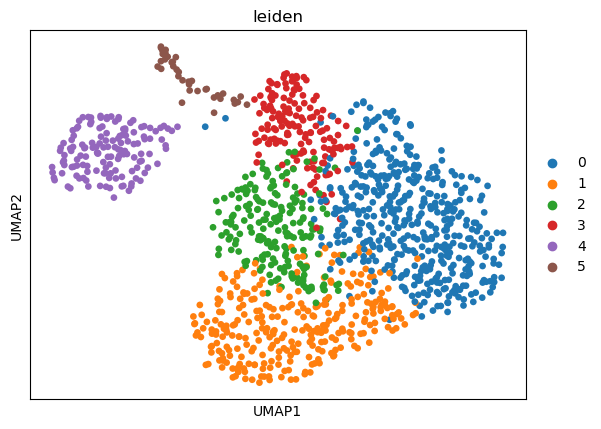

In [31]:
adata = scde
adata.obs['stage'] = 'E14'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = 'leiden')

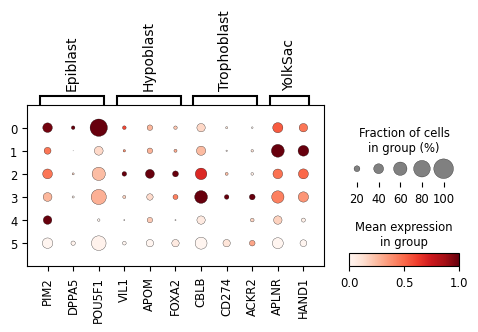

In [33]:
sc.pl.dotplot(
    scde,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    dot_max = 1.0,
    save = 'E14_marker_scde.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['PIM2','DPPA5','POU5F1','NANOG','KHDC3L','SFRP2','SPP1', 'GAL']) #Epi
sc.pl.umap(adata, color = ['VIL1','APOM','FOXA2','IHH','APOA1','CTSE','LGALS2','HNF1B']) #Hypo
sc.pl.umap(adata, color = ['CBLB','CD274','ACKR2','DLX3','HTRA4','ERVW-1','MGAT4A','PPARD']) #Troph
sc.pl.umap(adata, color = ['APLNR','HAND1','COL5A2','PITX2','FEZ1','HAPLN1','LIX1','RGS5']) #YS

In [36]:
adata.obs['merge_type'] = adata.obs.leiden.map({'0':'Epiblast',
                                                '1':'YolkSac',
                                                '2':'Hypoblast',
                                                '3':'Trophoblast',
                                                '4':'Others',
                                                '5':'Trophoblast'})

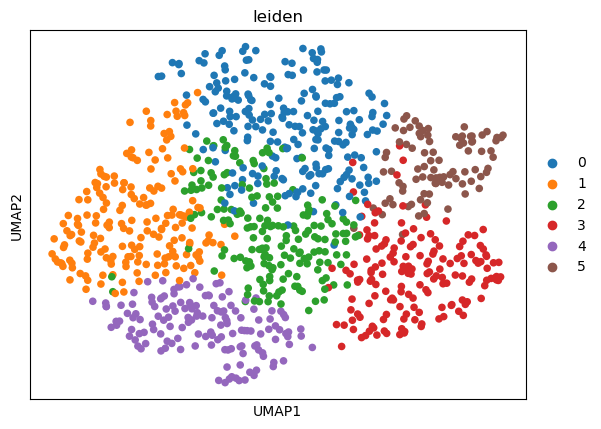

In [37]:
adata = scva
adata.obs['stage'] = 'E14'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = 'leiden')

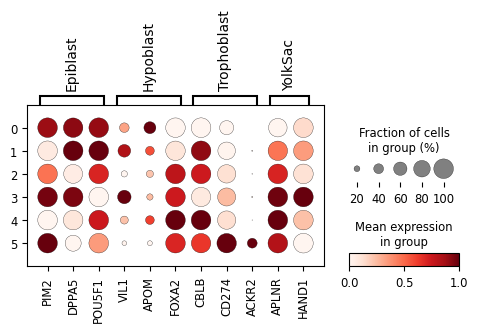

In [57]:
sc.pl.dotplot(
    scva,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'E14_marker_scva.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['PIM2','DPPA5','POU5F1','NANOG','KHDC3L','SFRP2','SPP1', 'GAL']) #Epi
sc.pl.umap(adata, color = ['VIL1','APOM','FOXA2','IHH','APOA1','CTSE','LGALS2','HNF1B']) #Hypo
sc.pl.umap(adata, color = ['CBLB','CD274','ACKR2','DLX3','HTRA4','ERVW-1','MGAT4A','PPARD']) #Troph
sc.pl.umap(adata, color = ['APLNR','HAND1','COL5A2','PITX2','FEZ1','HAPLN1','LIX1','RGS5']) #YS

In [39]:
adata.obs['merge_type'] = adata.obs.leiden.map({'0':'Epiblast',
                                                '1':'Hypoblast',
                                                '2':'Others',
                                                '3':'YolkSac',
                                                '4':'YolkSac',
                                                '5':'Trophoblast'})

In [40]:
spla.obs['merge_type'] = 'Unknown'
simp.obs['merge_type'] = 'Unknown'

In [42]:
cyto.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E14f_CytO.h5ad')
spla.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E14f_splatter.h5ad')
simp.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E14f_splatter_simple.h5ad')
scde.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E14f_scDesign3.h5ad')
scva.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/E14f_scVAEDer.h5ad')

# CS8

In [34]:
cyto = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS8f_CytO.h5ad')
spla = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS8f_splatter.h5ad')
simp = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS8f_splatter_simple.h5ad')
scde = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS8f_scDesign3.h5ad')
scva = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS8f_scVAEDer.h5ad')

In [59]:
real = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/data_standard/CS8.h5ad')

In [98]:
sc.pp.normalize_total(real, target_sum=1e4)
sc.pp.normalize_total(spla, target_sum=1e4)
sc.pp.normalize_total(simp, target_sum=1e4)
sc.pp.normalize_total(scde, target_sum=1e4)
scva.X = np.expm1(scva.X)
sc.pp.normalize_total(scva, target_sum=1e4)

scva.obs['time'] = 'CS8-scVAEDer'
name = new_list = [s + "-cell" for s in scva.obs.index]
scva.obs.index = name

spla.obs.time = 'CS8-Splatter'
simp.obs.time = 'CS8-Splatter-Simple'

/slurm/home/yrd/liaolab/caohaoxue/anaconda3/envs/my_env/lib/python3.13/site-packages/scanpy/preprocessing/_normalization.py:243: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


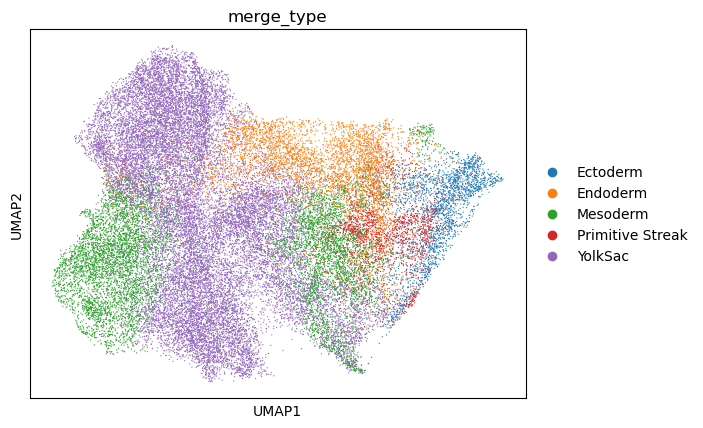

In [50]:
adata = real
sc.pp.normalize_total(real, target_sum=1e4)
adata.obs['stage'] = 'CS8'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color = 'merge_type')

In [68]:
combined = sc.concat([real,cyto],
                    join = 'inner')

In [70]:
real = combined[combined.obs.time == 'CS8']

In [71]:
sc.tl.rank_genes_groups(real, 'merge_type', method='wilcoxon')
marker_genes = pd.DataFrame(real.uns['rank_genes_groups']['names']).head(15)
marker_genes

/slurm/home/yrd/liaolab/caohaoxue/anaconda3/envs/my_env/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:669: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Ectoderm   Endoderm  Mesoderm Primitive Streak   YolkSac
0      PTMA        CKB      GYPC              MIF       AFP
1     L1TD1      KRT19      AHSP             PTMA     APOC3
2     SNRPN       PTMA      HBG1           IFITM1       TTR
3      LDHB    S100A10       HBZ           TUBB2B      AHSG
4    SEPHS1      EPCAM      HBG2           TUBB2A        TF
5     DPPA4  LINC01356       HBM            GSTP1     APOA2
6    PMAIP1        FN1      HBA1          LAPTM4B     APOA1
7      UGP2       TPI1      HBE1            HMGB3       VTN
8   LAPTM4B   SERPINE2  SLC25A37             LDHB    COL3A1
9       ADM       CST1      HBA2            FSCN1     APOA4
10    HSPA8       KRT8     BLVRB              SP5      FRZB
11   TUBB2B      GSTP1    SLC4A1            HSPA8       FGB
12    EPCAM       VCAN      FTH1            ALDOA      AQP1
13    SFRP1        MIF      GYPB           PCAT14  SERPINA1
14     HES1       CDH2      GYPA            SNRPN      GPC3

In [35]:
marker = {'Ectoderm':['PTMA','L1TD1','SNRPN'],
          'Endoderm':['CKB','KRT19'],
          'Mesoderm':['GYPC','AHSP'],
          'Primitive Streak':['MIF','IFITM1'],
          'YolkSac':['AFP','APOC3']}

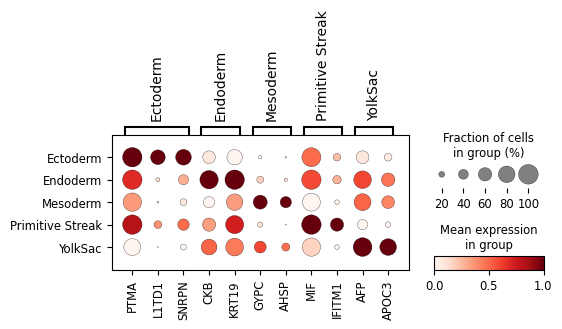

In [62]:
sc.pl.dotplot(
    real,
    groupby="merge_type",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'CS8_marker_real.pdf'
)

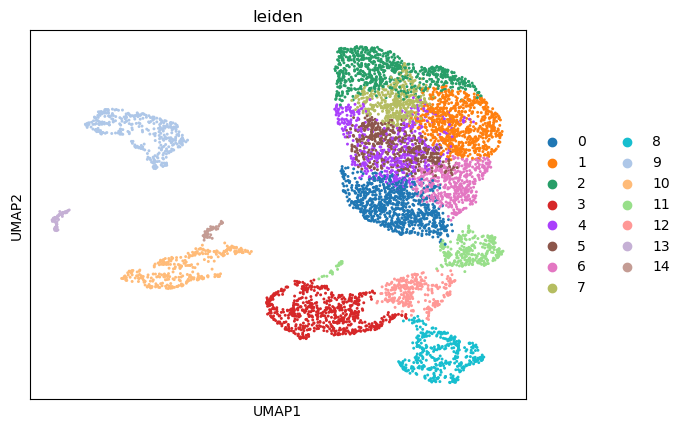

In [99]:
adata = cyto
adata.obs['stage'] = 'CS8'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = 'leiden')

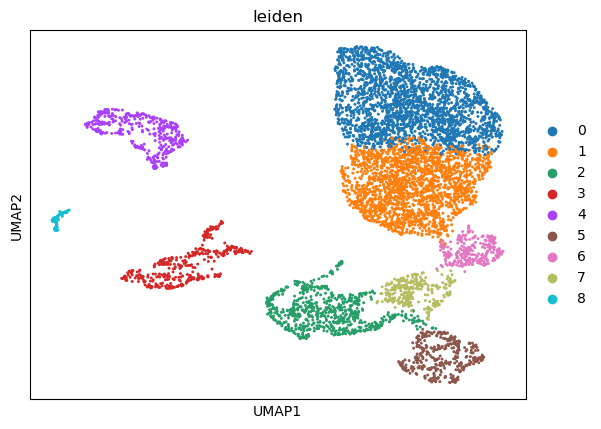

In [100]:
sc.tl.leiden(adata, resolution = 0.2)
sc.pl.umap(adata, color = 'leiden')

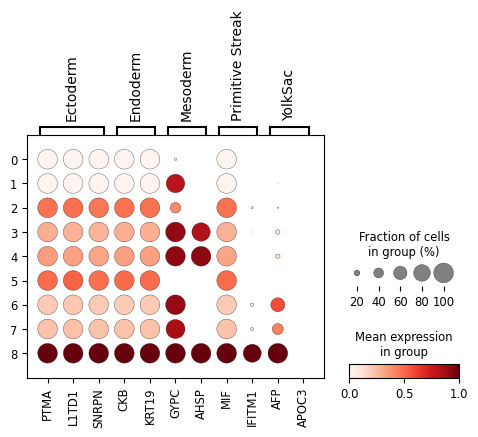

In [63]:
sc.pl.dotplot(
    cyto,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'CS8_marker_cyto.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['PTMA','L1TD1','SNRPN','LDHB','SEPHS1','DPPA4','PMAIP1','UGP2']) #Ecto
sc.pl.umap(adata, color = ['CKB','KRT19','PTMA','S100A10','EPCAM','FN1','TPI1','SERPINE2']) #Endo
sc.pl.umap(adata, color = ['GYPC','AHSP','HBG1','HBZ','HBG2','HBM','HBA1','HBE1']) #Meso
sc.pl.umap(adata, color = ['MIF','PTMA','IFITM1','TUBB2B','TUBB2A','GSTP1','LAPTM4B','HMGB3']) #PS
sc.pl.umap(adata, color = ['AFP','APOC3','TTR','AHSG','TF','APOA2','APOA1','VTN']) #YS

In [101]:
adata.obs['merge_type'] = adata.obs.leiden.map({'0':'Mesoderm',
                                                '1':'Mesoderm',
                                                '2':'Endoderm',
                                                '3':'Mesoderm',
                                                '4':'YolkSac',
                                                '5':'Ectoderm',
                                                '6':'Primitive Streak',
                                                '7':'Ectoderm',
                                                '8':'YolkSac'})

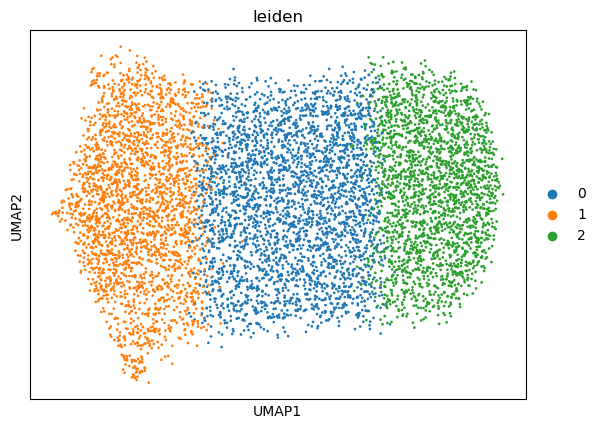

In [73]:
adata = spla
adata.obs['stage'] = 'CS8'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = 'leiden')

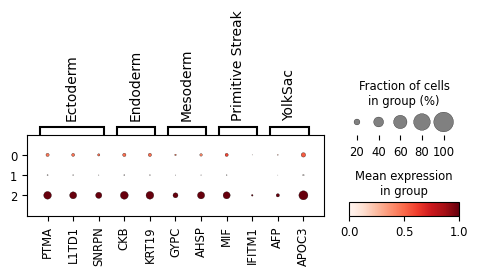

In [37]:
sc.pl.dotplot(
    spla,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    dot_max = 1.0,
    save = 'CS8_marker_spla.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['PTMA','L1TD1','SNRPN','LDHB','SEPHS1','DPPA4','PMAIP1','UGP2']) #Ecto
sc.pl.umap(adata, color = ['CKB','KRT19','PTMA','S100A10','EPCAM','FN1','TPI1','SERPINE2']) #Endo
sc.pl.umap(adata, color = ['GYPC','AHSP','HBG1','HBZ','HBG2','HBM','HBA1','HBE1']) #Meso
sc.pl.umap(adata, color = ['MIF','PTMA','IFITM1','TUBB2B','TUBB2A','GSTP1','LAPTM4B','HMGB3']) #PS
sc.pl.umap(adata, color = ['AFP','APOC3','TTR','AHSG','TF','APOA2','APOA1','VTN']) #YS

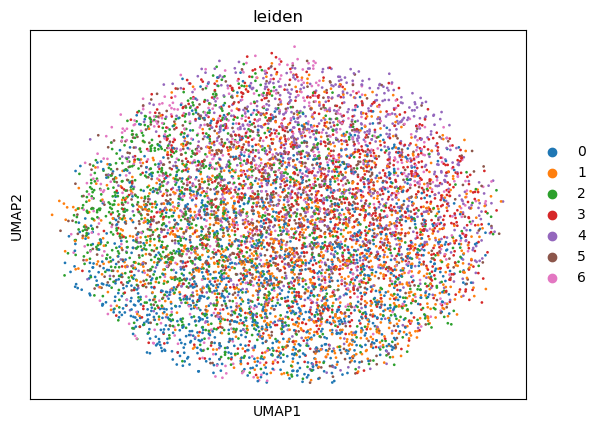

In [67]:
adata = simp
adata.obs['stage'] = 'CS8'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.7)
sc.pl.umap(adata, color = 'leiden')

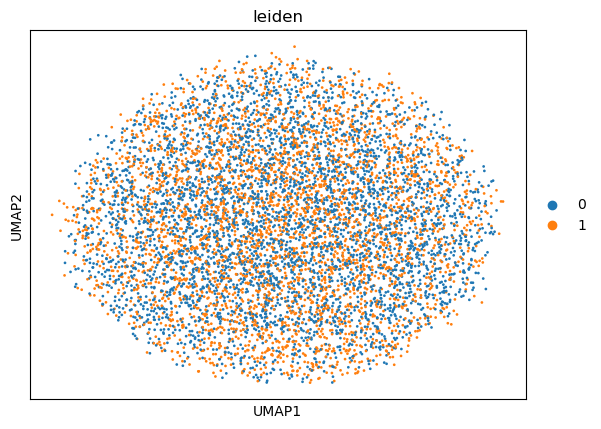

In [69]:
sc.tl.leiden(adata, resolution = 0.6)
sc.pl.umap(adata, color = 'leiden')

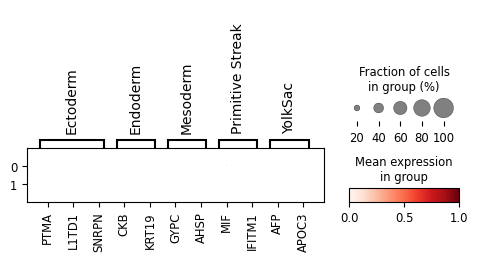

In [36]:
sc.pl.dotplot(
    simp,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    dot_max = 1.0,
    save = 'CS8_marker_simp.pdf'
)

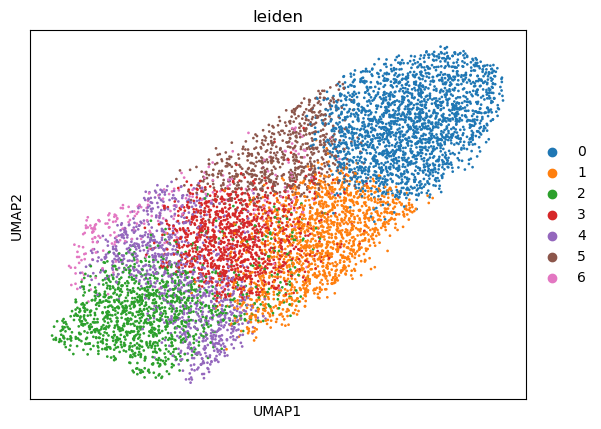

In [103]:
adata = scde
adata.obs['stage'] = 'CS8'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.8)
sc.pl.umap(adata, color = 'leiden')

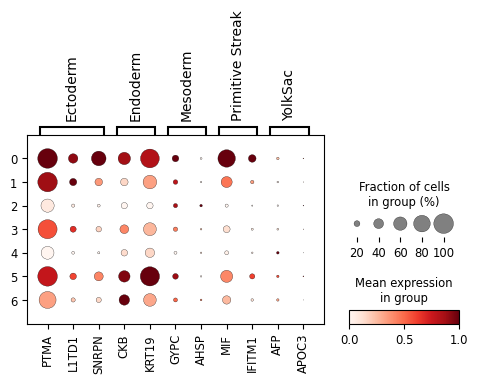

In [65]:
sc.pl.dotplot(
    scde,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'CS8_marker_scde.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['PTMA','L1TD1','SNRPN','LDHB','SEPHS1','DPPA4','PMAIP1','UGP2']) #Ecto
sc.pl.umap(adata, color = ['CKB','KRT19','PTMA','S100A10','EPCAM','FN1','TPI1','SERPINE2']) #Endo
sc.pl.umap(adata, color = ['GYPC','AHSP','HBG1','HBZ','HBG2','HBM','HBA1','HBE1']) #Meso
sc.pl.umap(adata, color = ['MIF','PTMA','IFITM1','TUBB2B','TUBB2A','GSTP1','LAPTM4B','HMGB3']) #PS
sc.pl.umap(adata, color = ['AFP','APOC3','TTR','AHSG','TF','APOA2','APOA1','VTN']) #YS

In [104]:
scde.obs['merge_type'] = adata.obs.leiden.map({'0':'Primitive Streak',
                                                '1':'Ectoderm',
                                                '2':'Mesoderm',
                                                '3':'Ectoderm',
                                                '4':'Mesoderm',
                                                '5':'Endoderm',
                                                '6':'YolkSac'})

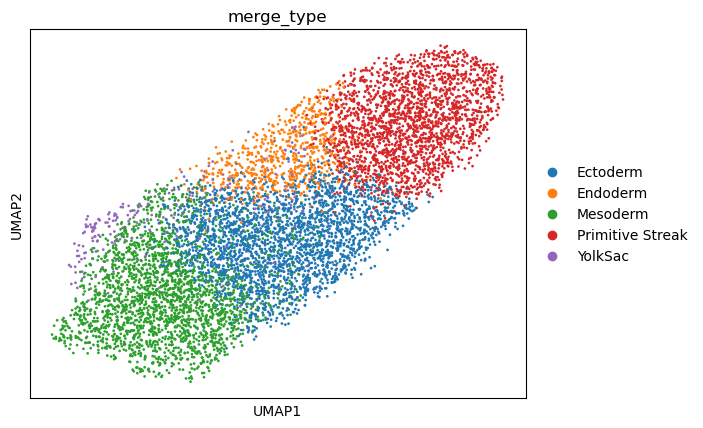

In [105]:
sc.pl.umap(adata, color = 'merge_type')

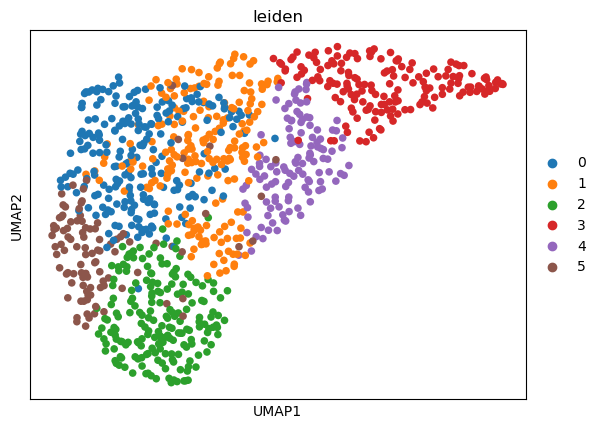

In [106]:
adata = scva
adata.obs['stage'] = 'CS8'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = 'leiden')

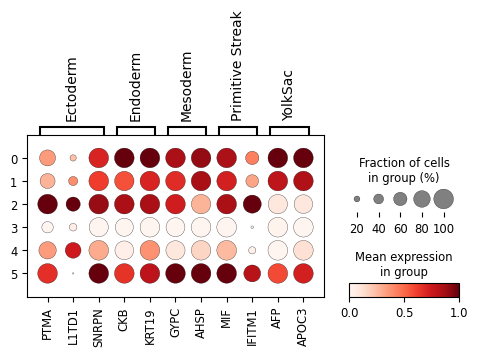

In [64]:
sc.pl.dotplot(
    scva,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'CS8_marker_scva.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['PTMA','L1TD1','SNRPN','LDHB','PMAIP1','UGP2']) #Ecto
sc.pl.umap(adata, color = ['CKB','KRT19','PTMA','S100A10','EPCAM','FN1','TPI1','SERPINE2']) #Endo
sc.pl.umap(adata, color = ['GYPC','AHSP','HBG1','HBZ','HBG2','HBM','HBA1','HBE1']) #Meso
sc.pl.umap(adata, color = ['MIF','PTMA','IFITM1','TUBB2B','TUBB2A','GSTP1','LAPTM4B','HMGB3']) #PS
sc.pl.umap(adata, color = ['AFP','APOC3','TTR','AHSG','TF','APOA2','APOA1','VTN']) #YS

In [107]:
adata.obs['merge_type'] = adata.obs.leiden.map({'0':'Endoderm',
                                                '1':'Ectoderm',
                                                '2':'YolkSac',
                                                '3':'Epiblast',
                                                '4':'Mesoderm',
                                                '5':'Primitive Streak'})

In [110]:
spla.obs['merge_type'] = 'Unknown'
simp.obs['merge_type'] = 'Unknown'
cyto.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS8f_CytO.h5ad')
spla.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS8f_splatter.h5ad')
simp.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS8f_splatter_simple.h5ad')
scde.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS8f_scDesign3.h5ad')
scva.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS8f_scVAEDer.h5ad')

# CS10

In [38]:
cyto = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS10f_CytO.h5ad')
spla = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS10f_splatter.h5ad')
simp = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS10f_splatter_simple.h5ad')
scde = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS10f_scDesign3.h5ad')
scva = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS10f_scVAEDer.h5ad')
real = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/data_standard/CS10.h5ad')

/slurm/home/yrd/liaolab/caohaoxue/anaconda3/envs/my_env/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
real.X = np.expm1(real.X)
real.var = real.var.rename(columns = {'x':'features'})
real.var.index = real.var.features
real.obs['time'] = 'CS10'

sc.pp.normalize_total(spla, target_sum=1e4)
sc.pp.normalize_total(simp, target_sum=1e4)
sc.pp.normalize_total(scde, target_sum=1e4)
scva.X = np.expm1(scva.X)
sc.pp.normalize_total(scva, target_sum=1e4)

scva.var['features'] = scva.var.index
scva.var.index = scva.var.features

scva.obs['time'] = 'CS10-scVAEDer'
name = [s + "-cell" for s in scva.obs.index]
scva.obs.index = name

spla.obs.time = 'CS10-Splatter'
simp.obs.time = 'CS10-Splatter-Simple'

In [4]:
combined = sc.concat([real,cyto],
                     join = 'inner')
real = combined[combined.obs.time == 'CS10']

/slurm/home/yrd/liaolab/caohaoxue/anaconda3/envs/my_env/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/tmp/ipykernel_57126/1000377138.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['stage'] = 'CS10'


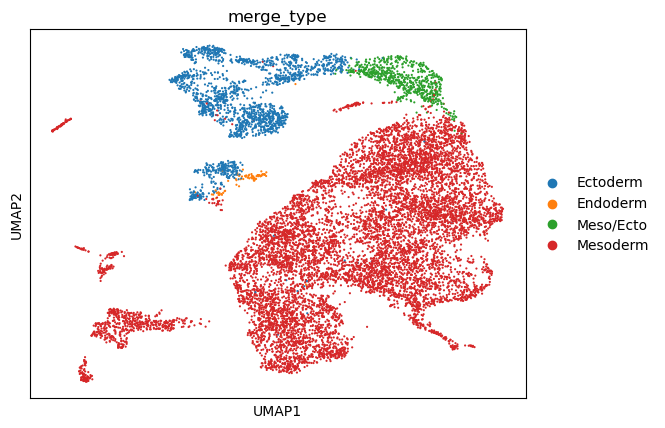

In [9]:
adata = real
adata.obs['stage'] = 'CS10'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color = 'merge_type')

In [10]:
sc.tl.rank_genes_groups(real, 'merge_type', method='wilcoxon')
marker_genes = pd.DataFrame(real.uns['rank_genes_groups']['names']).head(15)
marker_genes

Ectoderm Endoderm Meso/Ecto Mesoderm
0      SOX2    KRT19     HOXA7  S100A11
1       CLU    EPCAM      CDX2   SEPT11
2    CRABP1    CLDN6     FGF17   HAPLN1
3     TTYH1      CKB      URAD    KRT19
4     SFRP2    CYB5A      CRYM    ITM2A
5     MAP1B    CLDN4     HOXC6     GYPC
6       ADM     BCAM     WFDC2      B2M
7      FEZ1    CLDN3      FGF8    MFAP4
8      PAX6    WFDC2     HOXC8     SIX1
9    TFAP2A    CLDN7  HOXA-AS3    APLNR
10     SOX3    RAB25     WNT5B   COL1A2
11   FGFBP3     ELF3      SCG5    MFGE8
12     MT1F    PRSS8      HES7   IGFBP4
13     ALPL    APOA2     TNNT1  TSC22D3
14      PTN      TTR     TTYH1     RHOC

In [39]:
marker = {'Ectoderm':['SOX2','CLU','CRABP1'],
          'Endoderm':['KRT19','EPCAM','CLDN6'],
          'Mesoderm':['S100A11','HAPLN1','KRT19'],
          'Meso/Ecto':['HOXA7','CDX2']}

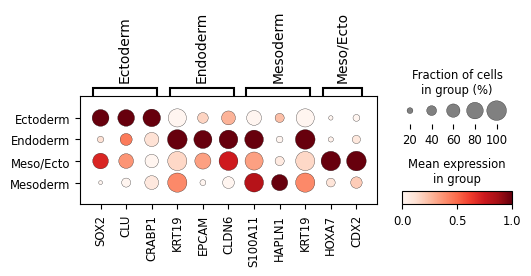

In [80]:
sc.pl.dotplot(
    real,
    groupby="merge_type",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'CS10_marker_real.pdf'
)

/tmp/ipykernel_57126/3132267587.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 0.5)


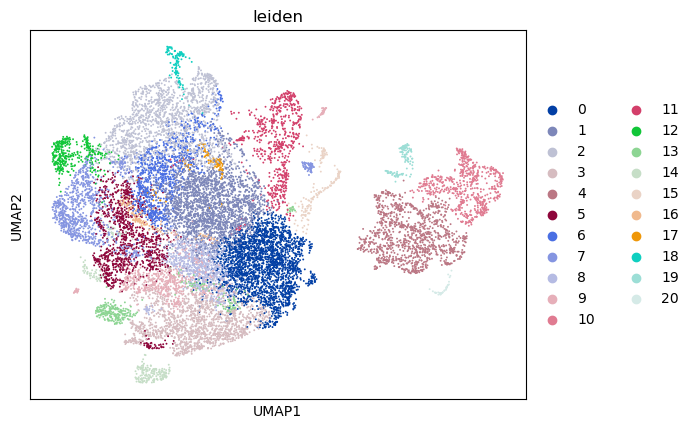

In [11]:
adata = cyto
adata.obs['stage'] = 'CS10'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = 'leiden')

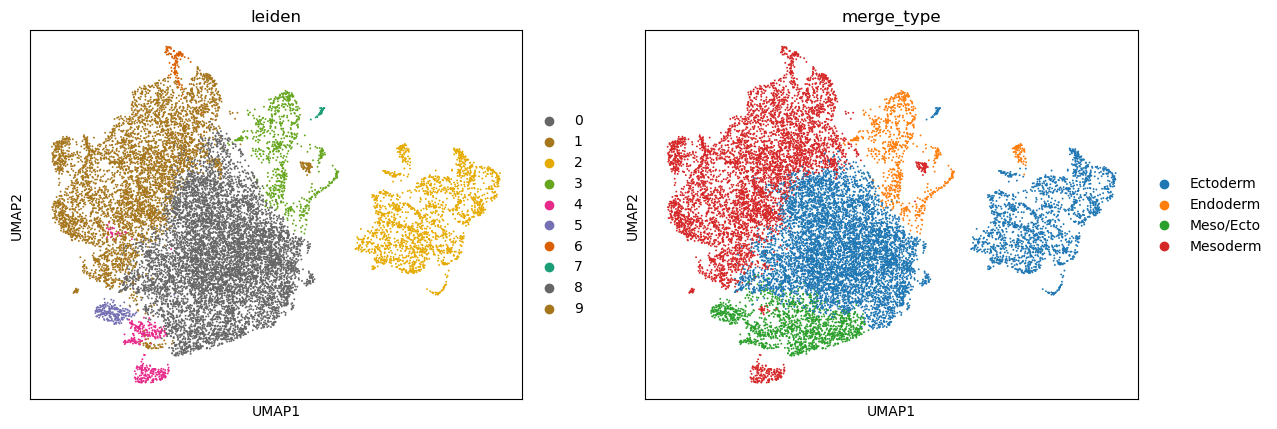

In [113]:
adata = cyto
sc.tl.leiden(adata, resolution = 0.13)
sc.pl.umap(adata, color = ['leiden','merge_type'])

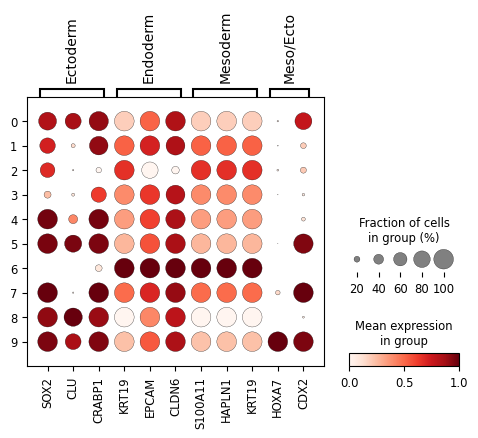

In [115]:
sc.pl.dotplot(
    cyto,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'CS10_marker_cyto.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['SOX2','CLU','CRABP1','TTYH1','SFRP2','MAP1B','ADM']) #Ecto
sc.pl.umap(adata, color = ['KRT19','EPCAM','CLDN6','CKB','CYB5A','CLDN4','BCAM']) #Endo
sc.pl.umap(adata, color = ['S100A11','SEPT11','HAPLN1','KRT19','ITM2A','GYPC','B2M','MFAP4']) #Meso
sc.pl.umap(adata, color = ['HOXA7','CDX2','FGF17','URAD','CRYM','HOXC6','WFDC2','FGF8']) #Me/Ec

In [23]:
adata.obs['merge_type'] = adata.obs.leiden.map({'0':'Ectoderm',
                                                '1':'Mesoderm',
                                                '2':'Mesoderm',
                                                '3':'Ectoderm',
                                                '4':'Meso/Ecto',
                                                '5':'Endoderm',
                                                '6':'Meso/Ecto',
                                                '7':'Endoderm',
                                                '8':'Ectoderm',
                                                '9':'Mesoderm'})

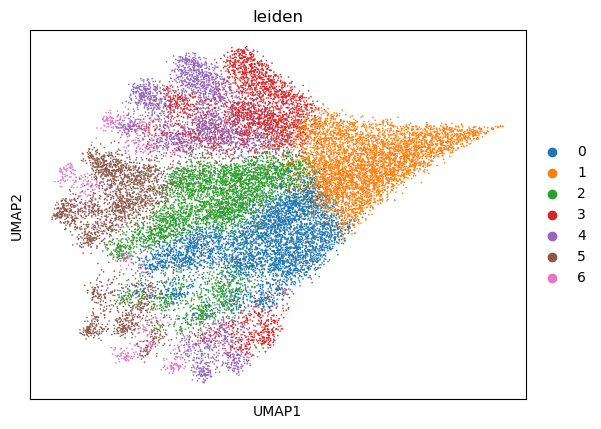

In [74]:
adata = spla
adata.obs['stage'] = 'CS10'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = 'leiden')

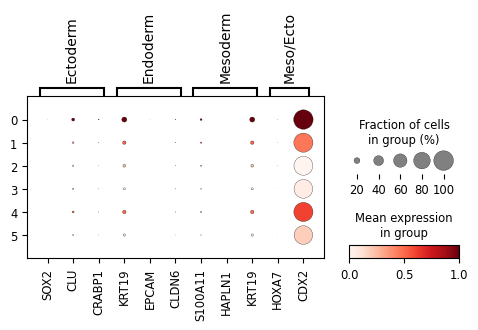

In [84]:
sc.pl.dotplot(
    spla,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'CS10_marker_spla.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['SOX2','CLU','CRABP1','TTYH1','SFRP2','MAP1B','ADM']) #Ecto
sc.pl.umap(adata, color = ['KRT19','EPCAM','CLDN6','CKB','CYB5A','CLDN4','BCAM']) #Endo
sc.pl.umap(adata, color = ['S100A11','SEPT11','HAPLN1','KRT19','ITM2A','GYPC','B2M','MFAP4']) #Meso
sc.pl.umap(adata, color = ['HOXA7','CDX2','FGF17','URAD','CRYM','HOXC6','WFDC2','FGF8']) #Me/Ec

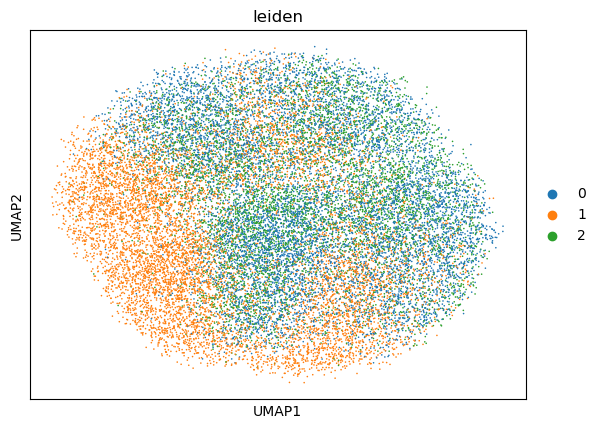

In [73]:
adata = simp
adata.obs['stage'] = 'CS10'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.6)
sc.pl.umap(adata, color = 'leiden')

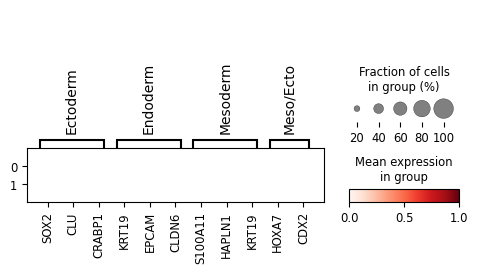

In [41]:
sc.pl.dotplot(
    simp,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    dot_max = 1.0,
    save = 'CS10_marker_simp.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['SOX2','CLU','CRABP1','TTYH1','SFRP2','MAP1B','ADM']) #Ecto
sc.pl.umap(adata, color = ['KRT19','EPCAM','CLDN6','CKB','CYB5A','CLDN4','BCAM']) #Endo
sc.pl.umap(adata, color = ['S100A11','SEPT11','HAPLN1','KRT19','ITM2A','GYPC','B2M','MFAP4']) #Meso
sc.pl.umap(adata, color = ['HOXA7','CDX2','FGF17','URAD','CRYM','HOXC6','WFDC2','FGF8']) #Me/Ec

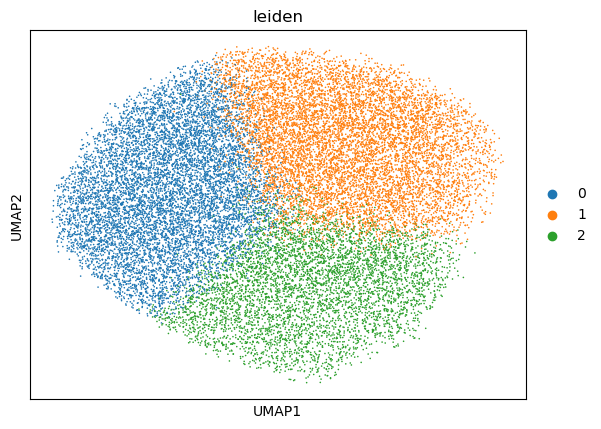

In [72]:
adata = scde
adata.obs['stage'] = 'CS10'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.6)
sc.pl.umap(adata, color = 'leiden')

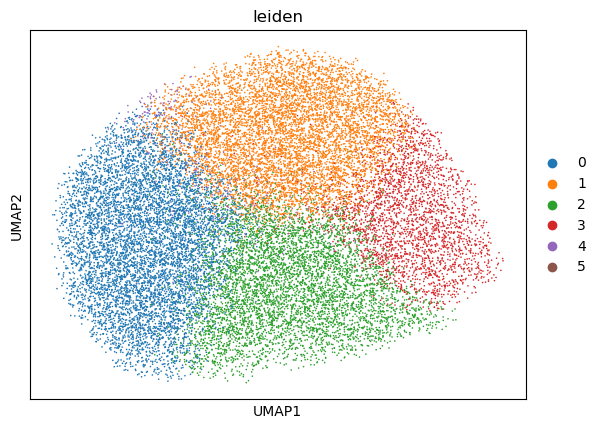

In [31]:
sc.tl.leiden(adata, resolution = 0.8)
sc.pl.umap(adata, color = 'leiden')

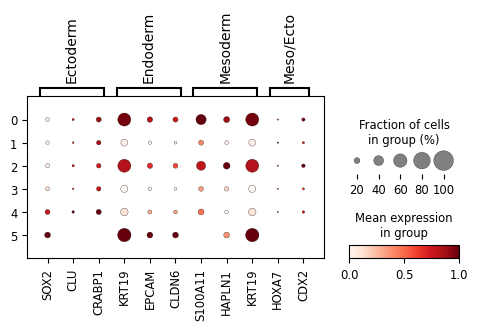

In [40]:
sc.pl.dotplot(
    scde,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    dot_max = 1.0,
    save = 'CS10_marker_scde.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['SOX2','CLU','CRABP1','TTYH1','SFRP2','MAP1B','ADM']) #Ecto
sc.pl.umap(adata, color = ['KRT19','EPCAM','CLDN6','CKB','CYB5A','CLDN4','BCAM']) #Endo
sc.pl.umap(adata, color = ['S100A11','SEPT11','HAPLN1','KRT19','ITM2A','GYPC','B2M','MFAP4']) #Meso
sc.pl.umap(adata, color = ['HOXA7','CDX2','FGF17','URAD','CRYM','HOXC6','WFDC2','FGF8']) #Me/Ec

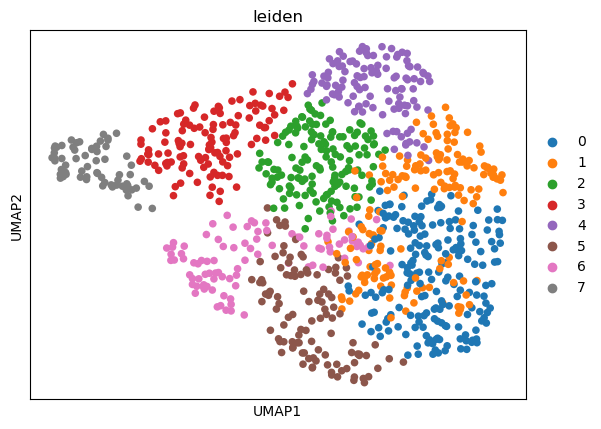

In [33]:
adata = scva
adata.obs['stage'] = 'CS10'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = 'leiden')

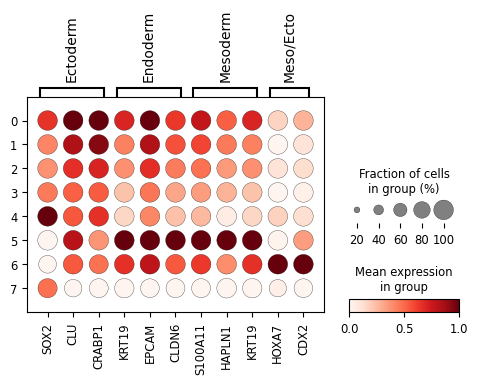

In [83]:
sc.pl.dotplot(
    scva,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'CS10_marker_scva.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['SOX2','CLU','CRABP1','TTYH1','SFRP2','MAP1B','ADM']) #Ecto
sc.pl.umap(adata, color = ['KRT19','EPCAM','CLDN6','CKB','CYB5A','CLDN4']) #Endo
sc.pl.umap(adata, color = ['S100A11','HAPLN1','KRT19','ITM2A','GYPC','B2M']) #Meso
sc.pl.umap(adata, color = ['HOXA7','CDX2','FGF17','URAD','CRYM','HOXC6','WFDC2','FGF8']) #Me/Ec

In [42]:
adata.obs['merge_type'] = adata.obs.leiden.map({'0':'Endoderm',
                                                '1':'Ectoderm',
                                                '2':'Mesoderm',
                                                '3':'Ectoderm',
                                                '4':'Ectoderm',
                                                '5':'Mesoderm',
                                                '6':'Mesoderm',
                                                '7':'Ectoderm',
                                                '8':'Ectoderm',
                                                '9':'Mesoderm'})

In [44]:
spla.obs['merge_type'] = 'Unknown'
simp.obs['merge_type'] = 'Unknown'
scde.obs['merge_type'] = 'Unknown'

In [45]:
cyto.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS10f_CytO.h5ad')
spla.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS10f_splatter.h5ad')
simp.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS10f_splatter_simple.h5ad')
scde.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS10f_scDesign3.h5ad')
scva.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS10f_scVAEDer.h5ad')

# CS11

In [ ]:
cyto = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS11f_CytO.h5ad')
spla = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS11f_splatter.h5ad')
simp = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS11f_splatter_simple.h5ad')
scde = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS11f_scDesign3.h5ad')
scva = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS11f_scVAEDer.h5ad')
real = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/data_standard/CS11.h5ad')

In [3]:
sc.pp.normalize_total(spla, target_sum=1e4)
sc.pp.normalize_total(simp, target_sum=1e4)
sc.pp.normalize_total(scde, target_sum=1e4)
scva.X = np.expm1(scva.X)
sc.pp.normalize_total(scva, target_sum=1e4)

scva.var['features'] = scva.var.index
scva.var.index = scva.var.features

scva.obs['time'] = 'CS11-scVAEDer'
name = [s + "-cell" for s in scva.obs.index]
scva.obs.index = name

spla.obs.time = 'CS11-Splatter'
simp.obs.time = 'CS11-Splatter-Simple'

In [117]:
overlap_genes = real.var_names.isin(cyto.var.index)

In [118]:
real = real[:, overlap_genes].copy()

In [119]:
overlap_genes = real.var_names.isin(scva.var.index)
real = real[:, overlap_genes].copy()

In [120]:
sc.tl.rank_genes_groups(real, 'merge_type', method='wilcoxon')
marker_genes = pd.DataFrame(real.uns['rank_genes_groups']['names']).head(15)
marker_genes

Ectoderm  Endoderm  Mesoderm  Others
0    SRGAP3       CKB  KCNQ1OT1  EEF1A1
1    PTPRZ1      TBX3     NEAT1    RPS2
2      SOX2    SLC2A3     MEIS2    PTMA
3      TLE4     NEAT1    MALAT1   RPS29
4      MIAT     EPCAM   ADAMTS6   RPS28
5      PAX6     VEGFA    COL6A1   RPL34
6      RFX4    MALAT1     CDH11  RPL37A
7    SLC2A3      APOE    PDGFRB   RPS27
8      MEG3  KCNQ1OT1     CALD1    ACTB
9     PTCH1       ID2    COL1A2     HBZ
10      DST       FN1     FOXP1   RPS4X
11   IGFBP2       ID1  HOTAIRM1   RPL39
12    SFRP2       ID4      AFF3     MDK
13    SOX11      RCN2      FBN2     VIM
14   LRRC4C     KRT19     FLRT2   GAPDH

In [121]:
marker = {'Ectoderm':['SRGAP3','PTPRZ1','SOX2','TLE4'],
          'Endoderm':['CKB','TBX3','SLC2A3'],
          'Mesoderm':['KCNQ1OT1','NEAT1','MEIS2','MALAT1']}

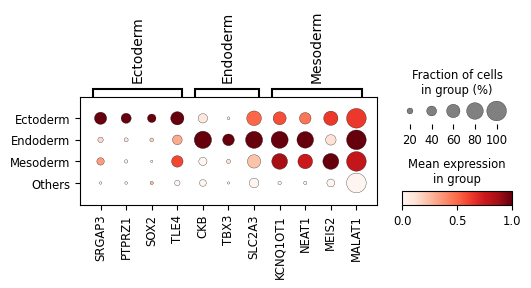

In [122]:
sc.pl.dotplot(
    real,
    groupby="merge_type",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'CS11_marker_real.pdf'
)

/tmp/ipykernel_24052/1711270278.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 0.5)


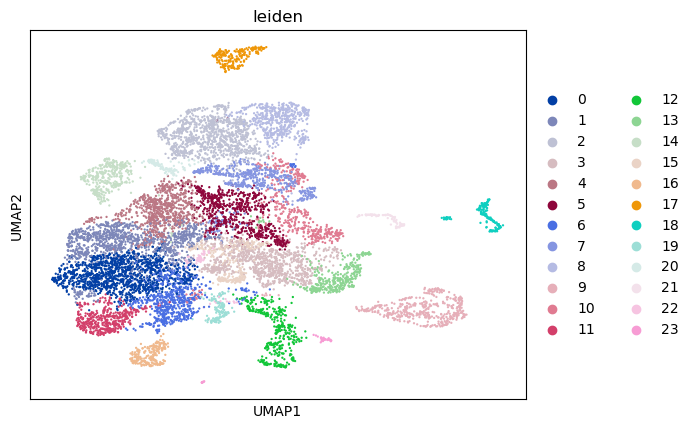

In [10]:
adata = cyto
adata.obs['stage'] = 'CS11'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = 'leiden')

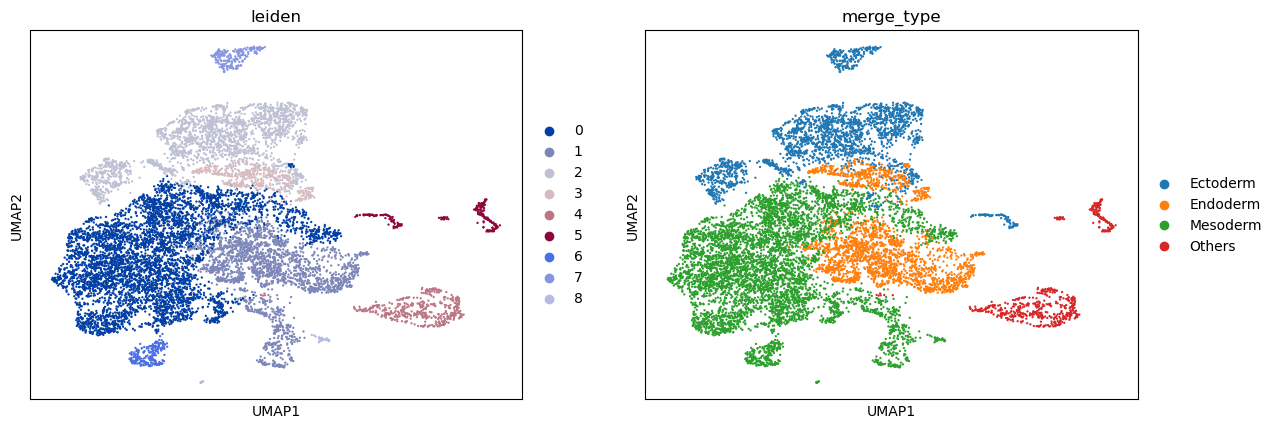

In [124]:
adata = cyto
sc.tl.leiden(adata, resolution = 0.06)
sc.pl.umap(adata, color = ['leiden','merge_type'])

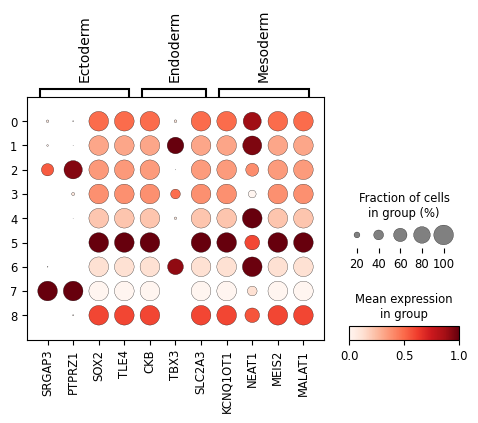

In [126]:
sc.pl.dotplot(
    cyto,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'CS11_marker_cyto.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['SRGAP3','PTPRZ1','SOX2','TLE4','MIAT','ADGRV1','PAX6']) #Ecto
sc.pl.umap(adata, color = ['CKB','TBX3','SLC2A3','NEAT1','EPCAM','VEGFA','MALAT1']) #Endo
sc.pl.umap(adata, color = ['KCNQ1OT1','NEAT1','MEIS2','MALAT1','ADAMTS6','COL6A1','CDH11','PDGFRB']) #Meso

In [29]:
adata.obs['merge_type'] = adata.obs.leiden.map({'0':'Mesoderm',
                                                '1':'Mesoderm',
                                                '2':'Endoderm',
                                                '3':'Ectoderm',
                                                '4':'Endoderm',
                                                '5':'Others',
                                                '6':'Ectoderm',
                                                '7':'Mesoderm',
                                                '8':'Mesoderm',
                                                '9':'Ectoderm',
                                                '10':'Others',
                                                '11':'Ectoderm'})

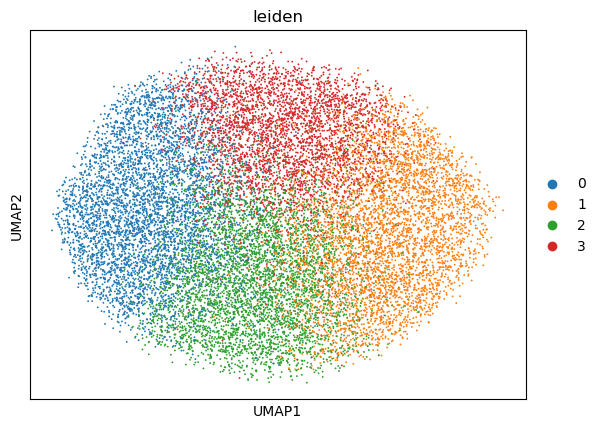

In [94]:
adata = spla
adata.obs['stage'] = 'CS11'
#sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.75)
sc.pl.umap(adata, color = 'leiden')

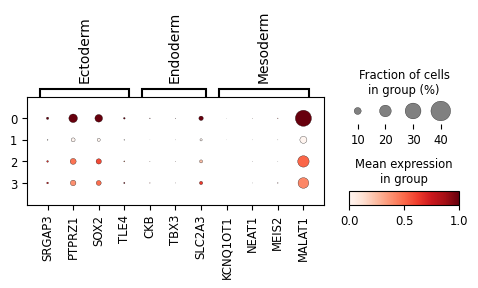

In [129]:
sc.pl.dotplot(
    spla,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'CS11_marker_spla.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['SRGAP3','PTPRZ1','SOX2','TLE4','MIAT','ADGRV1','PAX6']) #Ecto
sc.pl.umap(adata, color = ['CKB','TBX3','SLC2A3','NEAT1','EPCAM','VEGFA','MALAT1']) #Endo
sc.pl.umap(adata, color = ['KCNQ1OT1','NEAT1','MEIS2','MALAT1','ADAMTS6','COL6A1','CDH11','PDGFRB']) #Meso

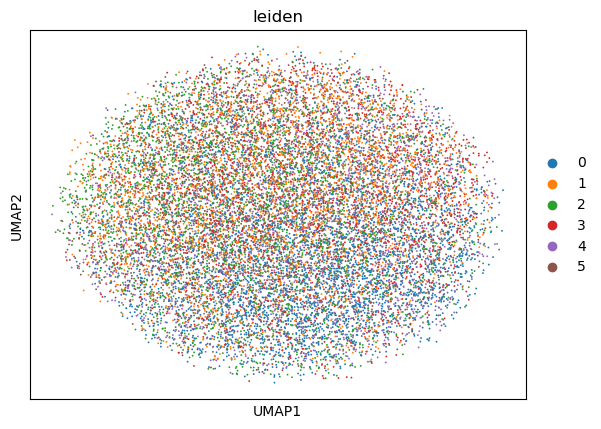

In [95]:
adata = simp
adata.obs['stage'] = 'CS11'
#sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.7)
sc.pl.umap(adata, color = 'leiden')

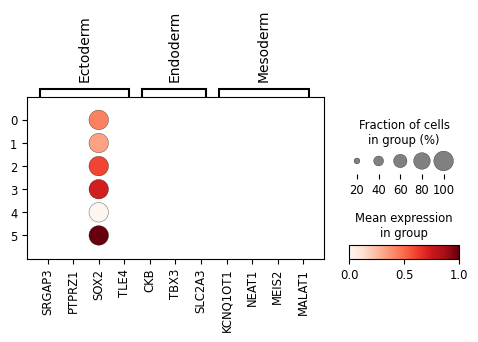

In [130]:
sc.pl.dotplot(
    simp,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'CS11_marker_simp.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['SRGAP3','PTPRZ1','SOX2','TLE4','MIAT','ADGRV1','PAX6']) #Ecto
sc.pl.umap(adata, color = ['CKB','TBX3','SLC2A3','NEAT1','EPCAM','VEGFA','MALAT1']) #Endo
sc.pl.umap(adata, color = ['KCNQ1OT1','NEAT1','MEIS2','MALAT1','ADAMTS6','COL6A1','CDH11','PDGFRB']) #Meso

In [ ]:
adata = scde
adata.obs['stage'] = 'CS11'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.6)
sc.pl.umap(adata, color = 'leiden')

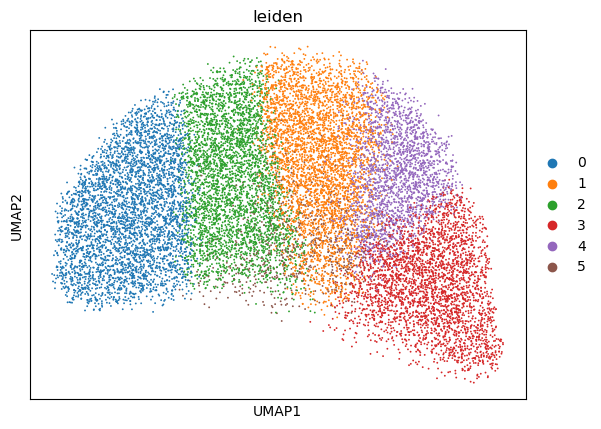

In [37]:
sc.tl.leiden(adata, resolution = 0.8)
sc.pl.umap(adata, color = 'leiden')

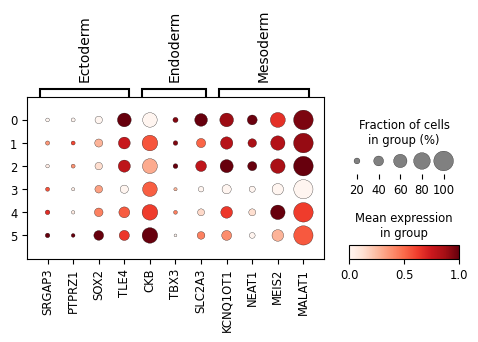

In [127]:
sc.pl.dotplot(
    scde,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'CS11_marker_scde.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['SRGAP3','PTPRZ1','SOX2','TLE4','MIAT','ADGRV1','PAX6']) #Ecto
sc.pl.umap(adata, color = ['CKB','TBX3','SLC2A3','NEAT1','EPCAM','VEGFA','MALAT1']) #Endo
sc.pl.umap(adata, color = ['KCNQ1OT1','NEAT1','MEIS2','MALAT1','ADAMTS6','COL6A1','CDH11','PDGFRB']) #Meso

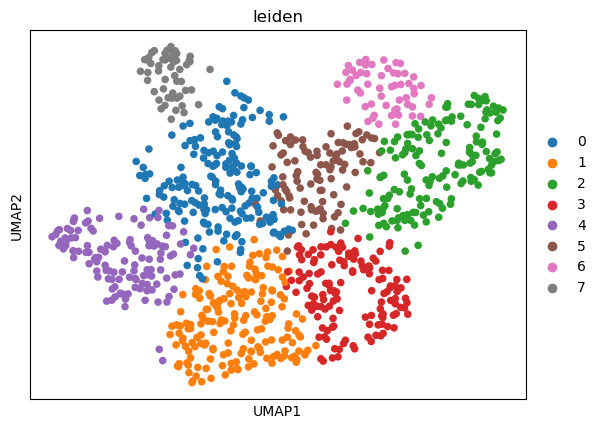

In [39]:
adata = scva
adata.obs['stage'] = 'CS11'
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = 'leiden')

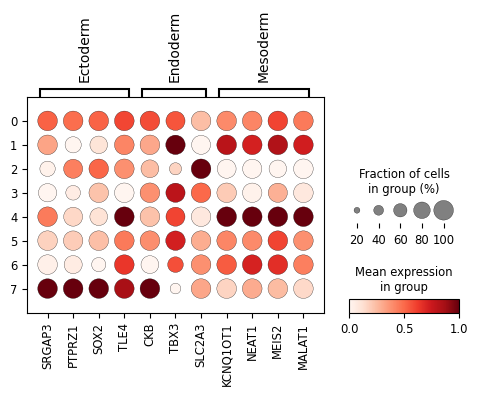

In [128]:
sc.pl.dotplot(
    scva,
    groupby="leiden",
    var_names=marker,
    standard_scale="var",
    use_raw = False,
    save = 'CS11_marker_scva.pdf'
)

In [ ]:
sc.pl.umap(adata, color = ['SRGAP3','PTPRZ1','SOX2','TLE4','MIAT','PAX6']) #Ecto
sc.pl.umap(adata, color = ['CKB','TBX3','SLC2A3','NEAT1','EPCAM','VEGFA','MALAT1']) #Endo
sc.pl.umap(adata, color = ['KCNQ1OT1','NEAT1','MEIS2','MALAT1','ADAMTS6','COL6A1','CDH11','PDGFRB']) #Meso

In [49]:
adata.obs['merge_type'] = adata.obs.leiden.map({'0':'Ectoderm',
                                                '1':'Mesoderm',
                                                '2':'Endoderm',
                                                '3':'Mesoderm',
                                                '4':'Mesoderm',
                                                '5':'Mesoderm',
                                                '6':'Mesoderm',
                                                '7':'Ectoderm'})

In [51]:
spla.obs['merge_type'] = 'Unknown'
simp.obs['merge_type'] = 'Unknown'
scde.obs['merge_type'] = 'Unknown'

In [52]:
cyto.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS11f_CytO.h5ad')
spla.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS11f_splatter.h5ad')
simp.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS11f_splatter_simple.h5ad')
scde.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS11f_scDesign3.h5ad')
scva.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/benchmark/simulated_matrix/h5ad_format/CS11f_scVAEDer.h5ad')